## Basic UVI ETC calculations 

Illustration of the simple wrapper for the HWO UVI spectrograph. This notebook uses two helper funcctions imported from the syotools module to (1) calculate SNR given a telescope/instrument/exposure time (uvspec_snr function) and (2) calculate exposure time given a telescope/instrument/SNR goal. 

First, import the wrapper functions (make sure you have activated the hwotools environment). 

In [8]:
from syotools.wrappers.uvspec import uvspec_snr, uvspec_exptime

First we will look at the function for computing SNR from an instrument, spectrum, and given exptime.

In [9]:
help(uvspec_snr)

Help on function uvspec_snr in module syotools.wrappers.uvspec:

uvspec_snr(telescope, mode, template, fuvmag, exptime, silent=True)
    Run a basic SNR calculation that takes in a telescope, 
    spectral template, normalization magnitude, and exposure 
    time to compute SNR. For converting magnitude, template, 
          and SNR to a desired exposure time, use uvspec_exptime.py 
    
    usage: 
          wave, snr, uvi = uvspec_snr(telescope, mode, template, uvmag, exptime) 
    
      positional arguments:
    
       1-telescope = 'EAC1', 'EAC2', or 'EAC3'. This argument is a string. 
         EAC1 = 6 m inner diameter, 7.2 outer diameter hex pattern, off-axis 
         EAC2 = 6 m diameter off-axis 
         EAC3 = 8 m diameter on-axis 
    
       2-mode = your choice of UVI grating, a string: 
                    ['G120M', 'G150M', 'G180M', 'G155L', 'G145LL', 'G300M']
    
       3-template = your choice of spectral template: 
                      ['flam', 'qso', 's99', 'o5v'

In [10]:
wave120, flux120, snr120, uvi = uvspec_snr('EAC1', 'G120M', 'orion', 19, 3.) 
wave150, flux150, snr150, uvi = uvspec_snr('EAC1', 'G150M', 'orion', 19, 3.) 
wave180, flux180, snr180, uvi = uvspec_snr('EAC1', 'G180M', 'orion', 19, 3.) 

wave300, flux300, snr300, uvi = uvspec_snr('EAC1', 'G300M', 'orion', 19, 1.) 

Exposure SED has been initialized to :  qso
unknown is  snr
_update_snr bef:  [1.23e-21 1.23e-21 1.23e-21 ... 9.71e-22 9.70e-22 9.70e-22] erg / (pix s cm2)
_update_snr phot_energy:  [1.60950912e-11 1.60947548e-11 1.60944183e-11 ... 1.12500041e-11
 1.12498391e-11 1.12496754e-11] erg / ct
_update_snr source_counts:  [2.28358712e-06 2.28326638e-06 2.28294561e-06 ... 1.16637828e-06
 1.16643169e-06 1.16648322e-06] ct / pix
_update_snr bg_counts:  [9.29494766e-07 9.29349124e-07 9.29203475e-07 ... 6.73035844e-07
 6.72422927e-07 6.72501694e-07] ct / pix
hello from sed_id setter orion
unknown is  snr
_update_snr bef:  [0.00e+00 0.00e+00 0.00e+00 ... 1.41e-21 1.41e-21 1.41e-21] erg / (pix s cm2)
_update_snr phot_energy:  [2.14673551e-11 2.14667357e-11 2.14661164e-11 ... 1.34712042e-11
 1.34709612e-11 1.34707173e-11] erg / ct
_update_snr source_counts:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.42981888e-06
 2.42999686e-06 2.43018126e-06] ct / pix
_update_snr bg_counts:  [0.00000000e+00

Text(0, 0.5, 'SNR per pixel')

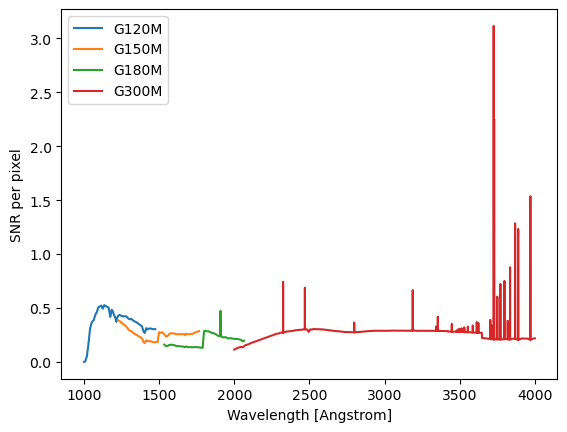

In [11]:
import matplotlib.pyplot as plt 

plt.plot(wave120, snr120, label='G120M')
plt.plot(wave150, snr150, label='G150M') 
plt.plot(wave180, snr180, label='G180M') 
plt.plot(wave300, snr300, label='G300M') 

plt.legend() 
plt.xlabel('Wavelength [Angstrom]') 
plt.ylabel('SNR per pixel') 

Next, we will look at the function for computing exptime from an instrument, spectrum, and given SNR.

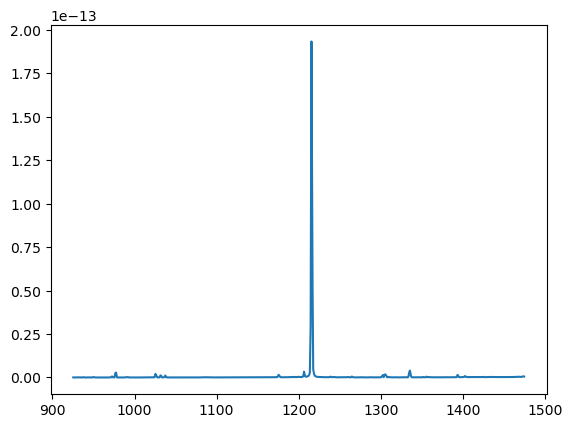

In [5]:
plt.plot(wave120, flux120, label='G120M')

In [6]:
#                                                tel.    mode. template fuvmag  snrgoal 
wave120, flux120, exp120, uvi = uvspec_exptime('EAC1', 'G120M', 'flat', 19,      10.) 
wave150, flux150, exp150, uvi = uvspec_exptime('EAC1', 'G150M', 'flat', 19,      10.) 
wave180, flux180, exp180, uvi = uvspec_exptime('EAC1', 'G180M', 'flat', 19,      10.) 
wave300, flux300, exp300, uvi = uvspec_exptime('EAC1', 'G300M', 'flat', 19,      10.) 

Exposure SED has been initialized to :  qso
unknown is  snr
_update_snr bef:  [1.23e-21 1.23e-21 1.23e-21 ... 9.71e-22 9.70e-22 9.70e-22] erg / (pix s cm2)
_update_snr phot_energy:  [1.60950912e-11 1.60947548e-11 1.60944183e-11 ... 1.12500041e-11
 1.12498391e-11 1.12496754e-11] erg / ct
_update_snr source_counts:  [2.28358712e-06 2.28326638e-06 2.28294561e-06 ... 1.16637828e-06
 1.16643169e-06 1.16648322e-06] ct / pix
_update_snr bg_counts:  [9.29494766e-07 9.29349124e-07 9.29203475e-07 ... 6.73035844e-07
 6.72422927e-07 6.72501694e-07] ct / pix
hello from sed_id setter flat
unknown is  snr
_update_snr bef:  [0.00e+00 0.00e+00 0.00e+00 ... 1.41e-21 1.41e-21 1.41e-21] erg / (pix s cm2)
_update_snr phot_energy:  [2.14673551e-11 2.14667357e-11 2.14661164e-11 ... 1.34712042e-11
 1.34709612e-11 1.34707173e-11] erg / ct
_update_snr source_counts:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.16021187e-06
 1.16024937e-06 1.16028975e-06] ct / pix
_update_snr bg_counts:  [0.00000000e+00 

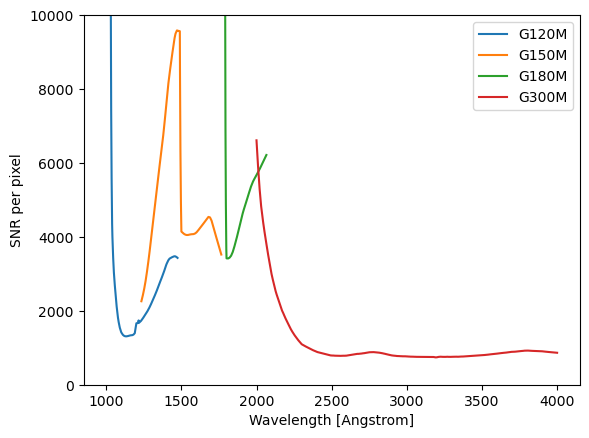

In [7]:
plt.plot(wave120, exp120, label='G120M')
plt.plot(wave150, exp150, label='G150M') 
plt.plot(wave180, exp180, label='G180M') 
plt.plot(wave300, exp300, label='G300M') 

plt.legend() 
plt.ylim(0, 10000)
plt.xlabel('Wavelength [Angstrom]') 
_ = plt.ylabel('SNR per pixel') 

#### NOTE: the uvspec_exptime function returns the time it would take to reach the snr_goal value at each pixel.  These SNR results cannot be obtained all at the same time! The system response varies with wavelength, but all wavelengths are observed at once for any given grating choice. So, use this to determine how long it would take to achive your SNR goal at your favorite wavelength, and disregard the other wavelengths in that trace.
